In [58]:
# Intution Behind Linear Regression Model
# Y = mX + c
# m = y2 - y1 / x2 - x1

# ADVANTAGES
# 1. Easy to implement
# 2. Perform well for linear relationship

# DISADVANTAGES
# 1. Sensitive to outliers
# 2. Not perform well for non-linear
# 3. Not perform well for categorical data
# 4. Sensitivity to outliers

In [59]:
# Math Behind Linear Regression Model
# Y = mX + c

# Loss Function :- Measure the difference between actual value and predicted value
# Loss = 1/n * sum((y - y_pred)^2)
# Low Loss value = High Accuracy

# Gradient Descent :- Optimization Algorithm to minimize the loss function
# m = m - L * Dm
# c = c - L * Dc
# Dm = -2/n * sum(x * (y - y_pred))
# Dc = -2/n * sum(y - y_pred)

# Dm --> Partial Derivative of loss function w.r.t m
# Dc --> Partial Derivative of loss function w.r.t c


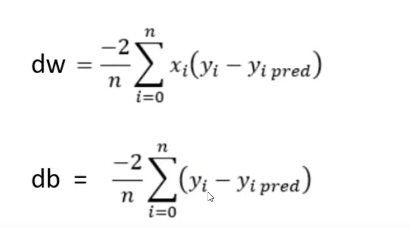

In [60]:
import numpy as np

In [61]:
# Linear Regression Model
class Linear_Regression() :
    # initiate some parameters like learning_rate, no_of_iterations(Hyperparameters)
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        # model parameters
        self.weights = None
        self.bias = None
 
    # x = years of experience y = salary
    def fit(self,X,Y):
        # no of training examples and no of features
        self.m,self.n = X.shape # no of rows and columns
        # initilize weights and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        # implemeting gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self,):
        Y_prediction = self.predict(self.X)
        # calculate gradients
        dW = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m
        # update weights
        self.w = self.w - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        
    def predict(self,X):
        return X.dot(self.w) + self.b
        

In [62]:
# What is Linear Regression?
# Linear Regression is a Supervised Machine Learning Algorithm which is used to 
# predict the continuous value of the target variable based on the given input data.                                                                                      

In [63]:
# Implementing Linear Regression 
# Work Flow
# Step-1 Set Learning Rate and No of Iterations ,Initiate Random Weights(features) and Bias values
# Step-2 Build Linear Regression Equation (Y = wx + b)
# Step-3 Find the "y pred" value for given x value for the corresponding weight and bias
# Step-4 Check the Loss Function for these parameters values. (difference between "y pred" and "y actual")
# Step-5 Update the parameter values using Gradient Descent.(new weight and bias value)
# Step-6 Repeat the above steps until the loss function is minimum.

In [64]:
# Importing Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [65]:
# loading data from csv file to pandas dataframe
salary_data = pd.read_csv('salary_data.csv')

In [66]:
# last 5 Rows of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [67]:
# last 5 Rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [68]:
# number of rows and columns
# tuple object is not callable
salary_data.shape

(30, 2)

In [69]:
# checking for null values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [70]:
# Splitting the features and target
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [71]:
# Splitting the dataset into trainig and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

In [72]:
#  Trainging the Linear Regression Model
# model parameter are weight and bias
    #                             these are hyperparameters          
model = Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [73]:
# fitting the model
model.fit(X_train,Y_train)

In [74]:
# printing the weights and bias values
print("weight = ",model.w[0])
print("bias = ",model.b)

weight =  9514.400999035135
bias =  23697.406507136307


In [75]:
# salary = (9514.400999035135 * experience) + 23697.406507136307

In [76]:
test_data_prediction = model.predict(X_test)

In [77]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


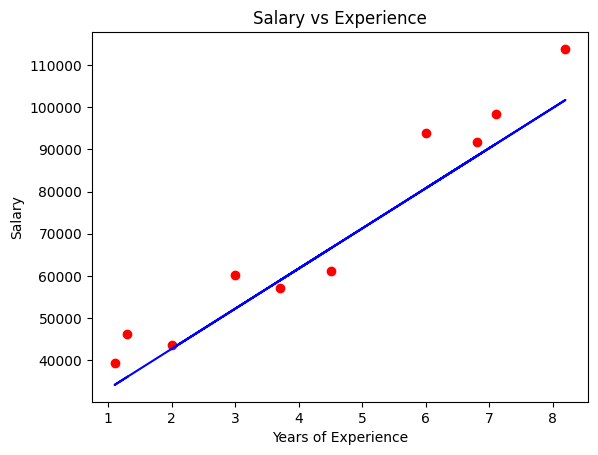

In [78]:
# visualizing the training set result
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')                      
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()